In [61]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import tweepy
import numpy as np
import pandas as pd 
from pprint import pprint
from datetime import datetime


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [62]:
# Target User Accounts
target_user = ("@CBS","@CNN","@FoxNews","@nytimes","@BBC")

# List for dictionaries of results
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
source=[]
text=[]
countr=[]
# Loop through each user
for user in target_user:

    # Variables for holding sentiments
  
    counter=1
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1,6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)
        #pprint(public_tweets)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            source.append(user)
            text.append(tweet['text'])
            countr.append(counter)
            counter+=1

    # Create a dictionaty of results
user_results = {
        "Source": source,
        "Compound Score": compound_list,
        "Postive Score": positive_list,
        "Neutral Score": neutral_list,
        "Negative Score": negative_list,
        "Text":text,
        "Tweets Ago":countr
    }

    # Append dictionary to list
    #results_list.append(user_results)
results_df = pd.DataFrame(user_results).round(3)
results_df.head()
#.set_index("Source")

,Compound Score,Negative Score,Neutral Score,Postive Score,Source,Text,Tweets Ago
0,0.91,0.0,0.549,0.451,@CBS,Celebrate #NationalAvocadoDay with @letsmakead...,1
1,0.34,0.0,0.876,0.124,@CBS,Housewives. PTA moms. School volunteers. Start...,2
2,0.75,0.0,0.727,0.273,@CBS,This is one allowance that can’t be beat! Kids...,3
3,0.00,0.0,1.000,0.000,@CBS,"Renowned artists Cher, Philip Glass, Reba McEn...",4
4,0.34,0.0,0.882,0.118,@CBS,Who's excited for the return of @MurphyBrownCB...,5


In [63]:
results_df['Source'].value_counts()

@BBC        100
@nytimes    100
@CNN        100
@FoxNews    100
@CBS        100
Name: Source, dtype: int64

In [64]:
sentiment_news = results_df.groupby(['Source'])
avr_compound = sentiment_news["Compound Score"].mean()
user = sentiment_news["Source"].unique()
sentiment_news_summary = pd.DataFrame({"Username": user.apply(''.join),"Average Compound Score": avr_compound})
sentiment_news_summary

,Average Compound Score,Username
Source,,
@BBC,0.11353,@BBC
@CBS,0.25592,@CBS
@CNN,0.04907,@CNN
@FoxNews,0.04830,@FoxNews
@nytimes,-0.04007,@nytimes


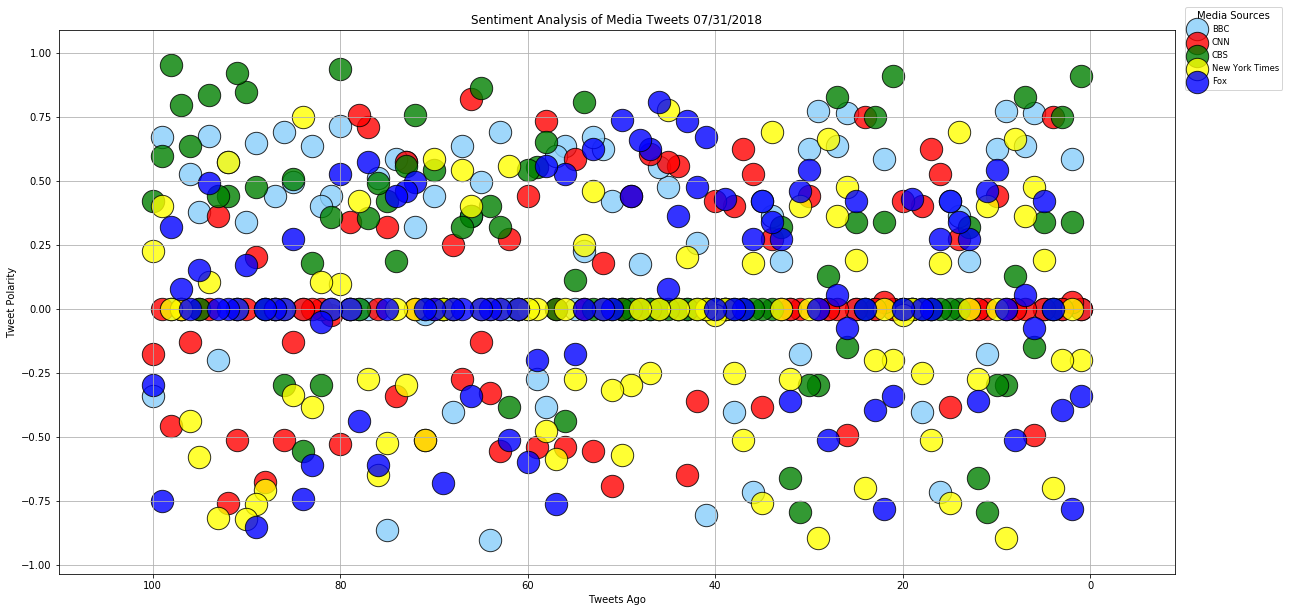

In [65]:

plt.figure(figsize=(20,10))
plt.scatter(bbc_sentiments_df['Tweets Ago'], 
            bbc_sentiments_df['Compound Score'], 
            s=500, c="lightskyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBC")
plt.scatter(cnn_sentiments_df['Tweets Ago'], 
            cnn_sentiments_df['Compound Score'], 
            s=500, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")
plt.scatter(cbs_sentiments_df['Tweets Ago'], 
            cbs_sentiments_df['Compound Score'], 
            s=500, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")
plt.scatter(nytimes_sentiments_df['Tweets Ago'], 
            nytimes_sentiments_df['Compound Score'], 
            s=500, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="New York Times")
plt.scatter(foxnews_sentiments_df['Tweets Ago'], 
            foxnews_sentiments_df['Compound Score'], 
            s=500, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Fox")
today_date = datetime.now().strftime('%m/%d/%Y')
plt.title(f"Sentiment Analysis of Media Tweets {today_date}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc='best', title="Media Sources", 
                  labelspacing=0.5,bbox_to_anchor=(1.1, 1.05))
plt.xlim([results_df["Tweets Ago"].max()+10,results_df["Tweets Ago"].min()-10])
plt.savefig("Sentiment Analysis of media.png")
plt.grid()

In [66]:
results_df.groupby("Source").mean()

,Compound Score,Negative Score,Neutral Score,Postive Score,Tweets Ago
Source,,,,,
@BBC,0.11353,0.06440,0.83398,0.10163,50.5
@CBS,0.25592,0.02057,0.83666,0.14280,50.5
@CNN,0.04907,0.04649,0.88683,0.06669,50.5
@FoxNews,0.04830,0.08286,0.82192,0.09521,50.5
@nytimes,-0.04007,0.07153,0.86703,0.06145,50.5


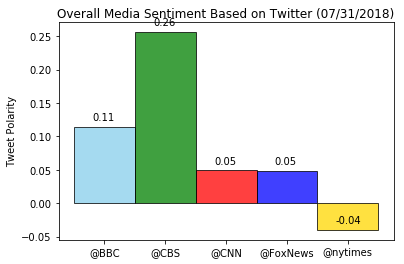

In [67]:
color = ('skyblue','green','red','blue','gold')

bar = plt.bar(sentiment_news_summary["Username"],sentiment_news_summary["Average Compound Score"],width = 1,alpha=0.75, edgecolor = 'black', color=color)

#Create markers on bars
for x, y in enumerate(sentiment_news['Compound Score'].mean()): 
   plt.text(x-0.2 , y+0.01, str(round(y,2)), color='black')

# Incorporate the other graph properties
plt.title(f"Overall Media Sentiment Based on Twitter ({today_date})")
plt.ylabel("Tweet Polarity")

# Save Figure
plt.savefig("overall_sentiment_tweets.png")

In [68]:
results_df.to_csv("News_Sentiment.csv", encoding="utf-8", index=False)